In [1]:
from fastai2.vision.all import *

# Construindo a base de dados
*Baseado nos capitulos do livro [The fastai book](https://github.com/fastai/fastbook)*

Ressalta-se que nosso objetivo é obter um conjunto de dados simples para extrair resultados preliminares. Em Machine Learning, no inicio de um projeto, o ideal é iniciar de forma simples.

Depois de analisar o desempenho do modelo neste dataset inicial, verificando os erros mais frequentes, o conjunto de dados sera moldado de forma mais consciente.

Neste notebook, uma base de dados com amostras
de imagens de sinais de transito de quatro classes distintas: priority_road,give_way, stop, no_entry sera criada.

Para cada classe, os seguintes passos foram realizados:


## Obtendo uma lista de URLs

O primeiro passo consiste em realizar uma pesquisa no [Google Images](http://images.google.com), especificando claramente o tipo de imagem que procura, como o exemplo abaixo.

    "priority road traffic sign"
    

Em seguida, um arquivo contendo as URLs dos arquivos é gerado. No Google Chrome pressionando <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux, um console em JavaScript é aberto. O seguinte comando realiza o download do arquivo contendo as URLs:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

## Criando as pastas para cada classe

In [2]:
folder = 'priority_road'
file = 'urls_priority_road.csv'

In [3]:
path = Path('data/traffic_signs')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

## Realizando o download das imagens

In [5]:
download_images(dest, path/file)

Para cada classe, os passos acimas foram realizados. Em seguida, um filtro manual foi realizado, uma vez que durante as pesquisas, imagens não representativas são obtidas. 

In [4]:
path.ls()

(#8) [Path('data/traffic_signs/urls_priority_road.csv'),Path('data/traffic_signs/urls_stop.csv'),Path('data/traffic_signs/stop'),Path('data/traffic_signs/give_way'),Path('data/traffic_signs/no_entry'),Path('data/traffic_signs/priority_road'),Path('data/traffic_signs/urls_no_entry.csv'),Path('data/traffic_signs/urls_give_way.csv')]

## Apos o filtro manual, 380 imagens no total foram obtidas.

In [5]:
path = Path('data/traffic_signs')

In [6]:
fns = get_image_files(path)
fns

(#380) [Path('data/traffic_signs/stop/00000035.jpg'),Path('data/traffic_signs/stop/00000228.jpg'),Path('data/traffic_signs/stop/00000202.jpg'),Path('data/traffic_signs/stop/00000103.jpg'),Path('data/traffic_signs/stop/00000135.jpg'),Path('data/traffic_signs/stop/00000262.jpg'),Path('data/traffic_signs/stop/00000201.jpg'),Path('data/traffic_signs/stop/00000114.jpg'),Path('data/traffic_signs/stop/00000110.jpg'),Path('data/traffic_signs/stop/00000160.jpg')...]

## Visualizando algumas amostras

In [7]:
signs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [8]:
dls = signs.dataloaders(path)

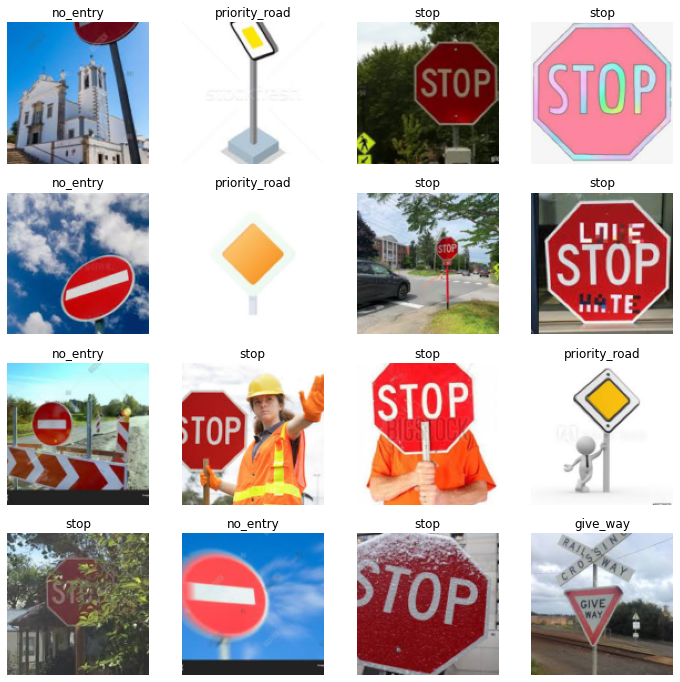

In [9]:
dls.valid.show_batch(max_n=16, nrows=4)